In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is an approach for analyzing data sets to summarize their main characteristics, often using statistical graphs and other visualization methods. Essentially, EDA is a fancy name for "studying data."

EDA is different from Initial Data Analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting, handling missing values, and making transformations of variables as needed. EDA, on the other hand, takes a more graphical approach to understanding a given data set.

We will go over how to handle missing values, outliers, etc., in the next. For now, let's focus on understanding different types of graphs and their meanings.


#### Let's import the winequality dataset.


In [2]:
data = pd.read_csv("./data/winequality-white.csv", sep= ";")

#### **Box Plot**
Also known as the Box-and-Whisker Plot, it helps represent data in terms of a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

- These lines that look like whiskers extend from each end, representing the lower and upper bounds.
- Any values beyond these bounds are displayed with a circle (or any symbol). These are the outliers.
- The Box: Represents the IQR, with the middle line marking the 50th percentile (median line) and spanning from Q1 to Q3 (middle 50% of the data).
- The length of the box and whiskers indicates how spread out the data is.
- The symmetry of the box helps in identifying the skewness of the data.

The whiskers at the end can represent other values as well, like min and max. Though this will then not make it possible to undestand the presence of outliers.

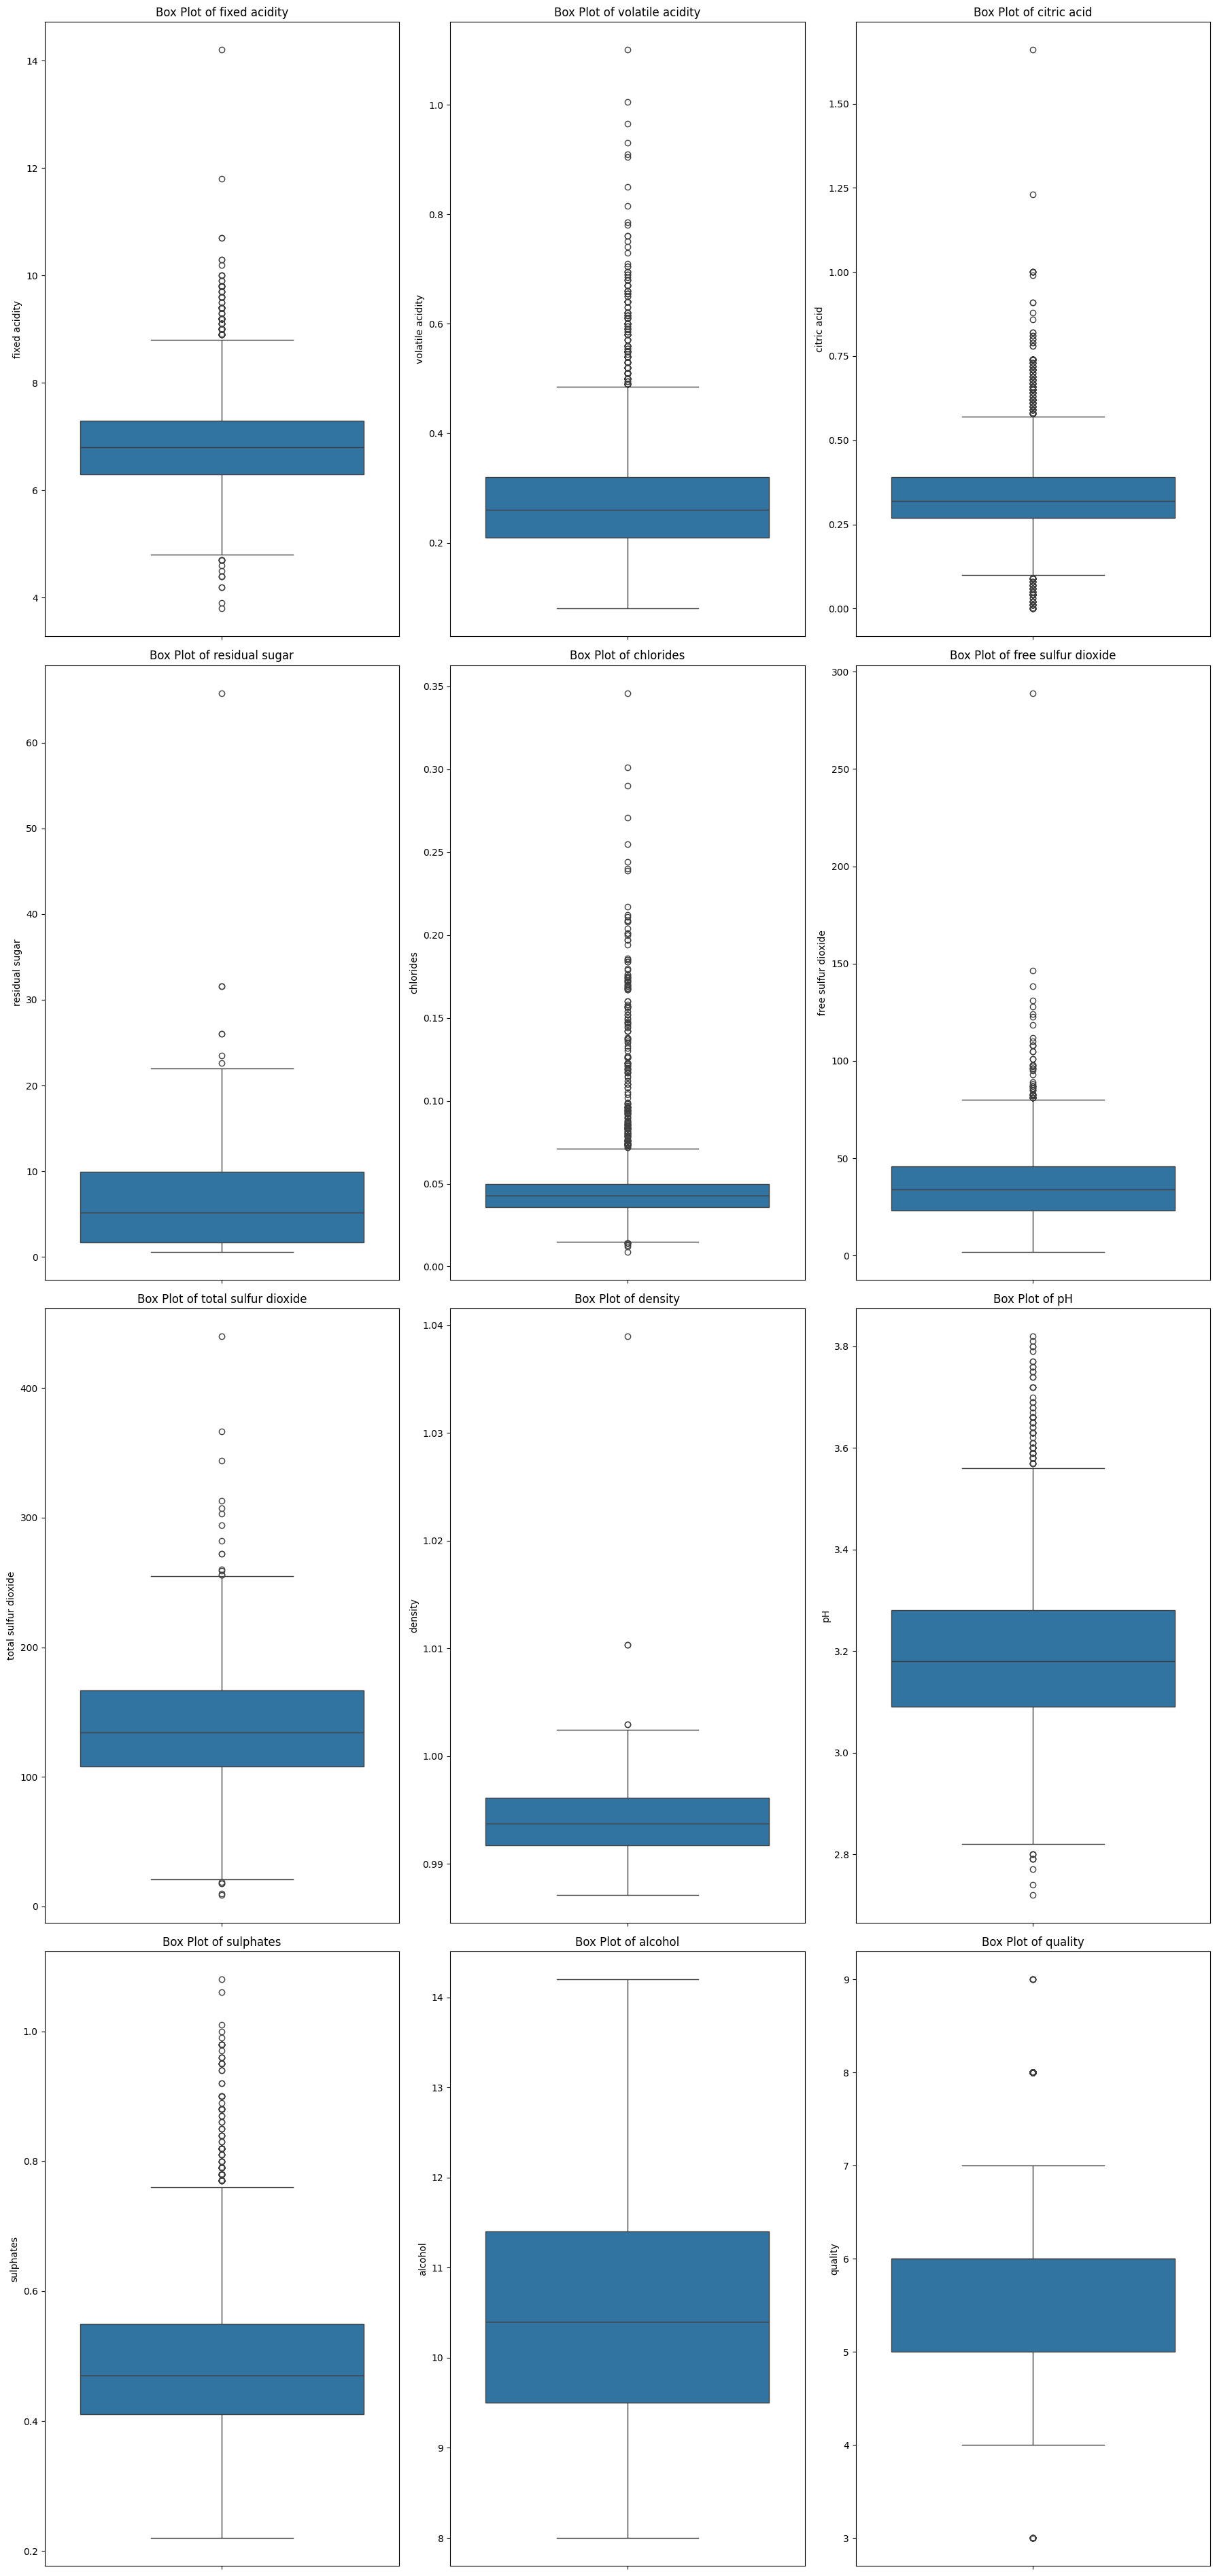

In [3]:
# let's plot the BOX PLOT
fig, axes = plt.subplots(4, 3, figsize=(18,38))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.boxplot(data=data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')


plt.tight_layout()
plt.show()

#### Except alcohol every other colums have outlier present. Most of the columns are positivly Skewed (box above the median line is larger than the below).
The Quality column's boxplot doesn't have a center line (median line), it may appear that way but the median value is equal to the Q3 value so they are actually coinciding.

#### **Histogram**
A histogram shows the frequency distribution of data by dividing it into intervals called bins and counting the number of values that fall into each interval.

- Bars: Represent the total number of values within each bin interval (bin width).
- Bins and Bin Width: Bins (Class Intervals) are the intervals into which the data is grouped, and the bin width is the range of values each bin covers. 
- Shape of this Distribution can help undestand what type of distribution we have:-
    - Normal Distribution : Bell shaped curve indicating data is symmetrically distributed
    - Skewed Distribution : If histogram shifts towards left or right, it indicates positive and negative skewedness.
    - Uniform Distribution : All bins have approx same amount of data, meaning evenly distributed.
    - Multimodial Distribution : Presence of multiple peaks in the graph, suggesting multiple different groups. (if there are 2 peaks then Bimodial, 1 then unimodial)
- Presence of Bins with Unusually Low Amount of Data indicates outliers.


#### While plotting these if class interval is not equal for all then this should be reflected in the height of that bin.

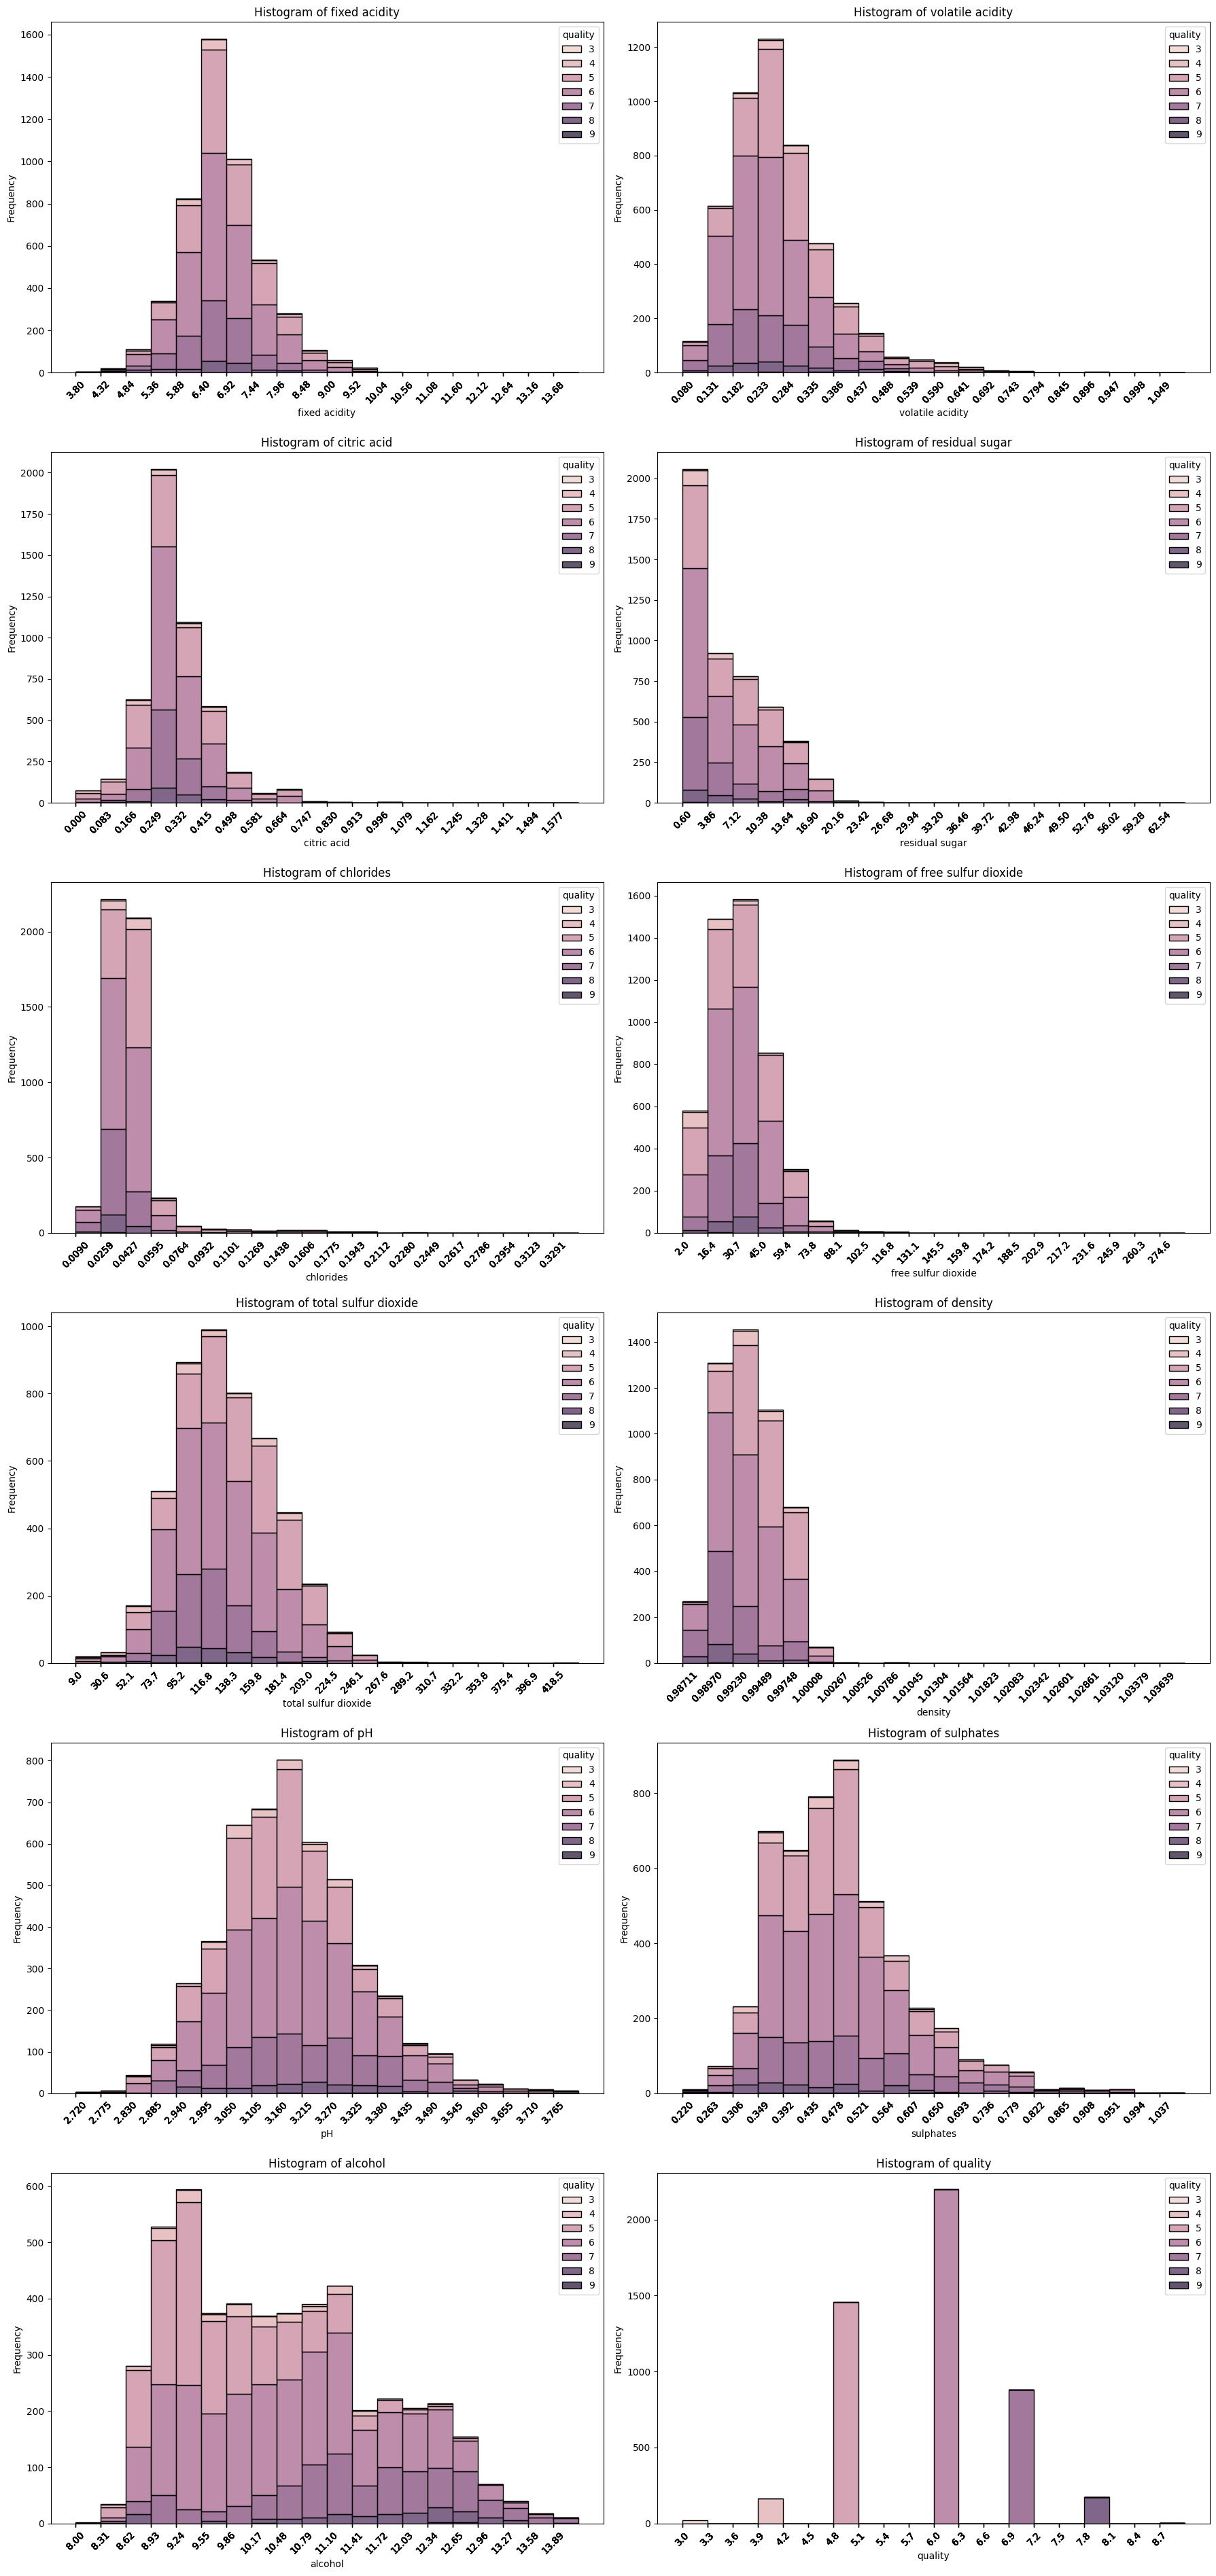

In [4]:
# Let's plot the histogram
fig, axes = plt.subplots(6, 2, figsize=(18,38))
axes = axes.flatten()

for i, column in enumerate(data):
    sns.histplot(data=data, x=column,bins=20,hue='quality',multiple="stack",ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Adjusting the x label to show vlaues at start and end of each bin
    # Ticks in a plot are the small marks (along x and y axis)
    bin_edges = axes[i].patches[0].get_bbox().bounds #.get_bbox() finds the bounds of the particular bin it returns a list [x,y,width,height]
                                                     #.patches[0] picks up the particular bin
    ticks = [patch.get_x() for patch in axes[i].patches] + [bin_edges[2] + bin_edges[0]]
    axes[i].set_xticks(ticks)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# I Have displayed the ticks or at the endpoint of the bar or the Class Boundaries. Usually we display a Class's midpoint or 'Class Mark'


##### Here we are plotting the Frequency Polygon which is a line graph created using class frequency vs class mark (mid point of the class interval or bins)

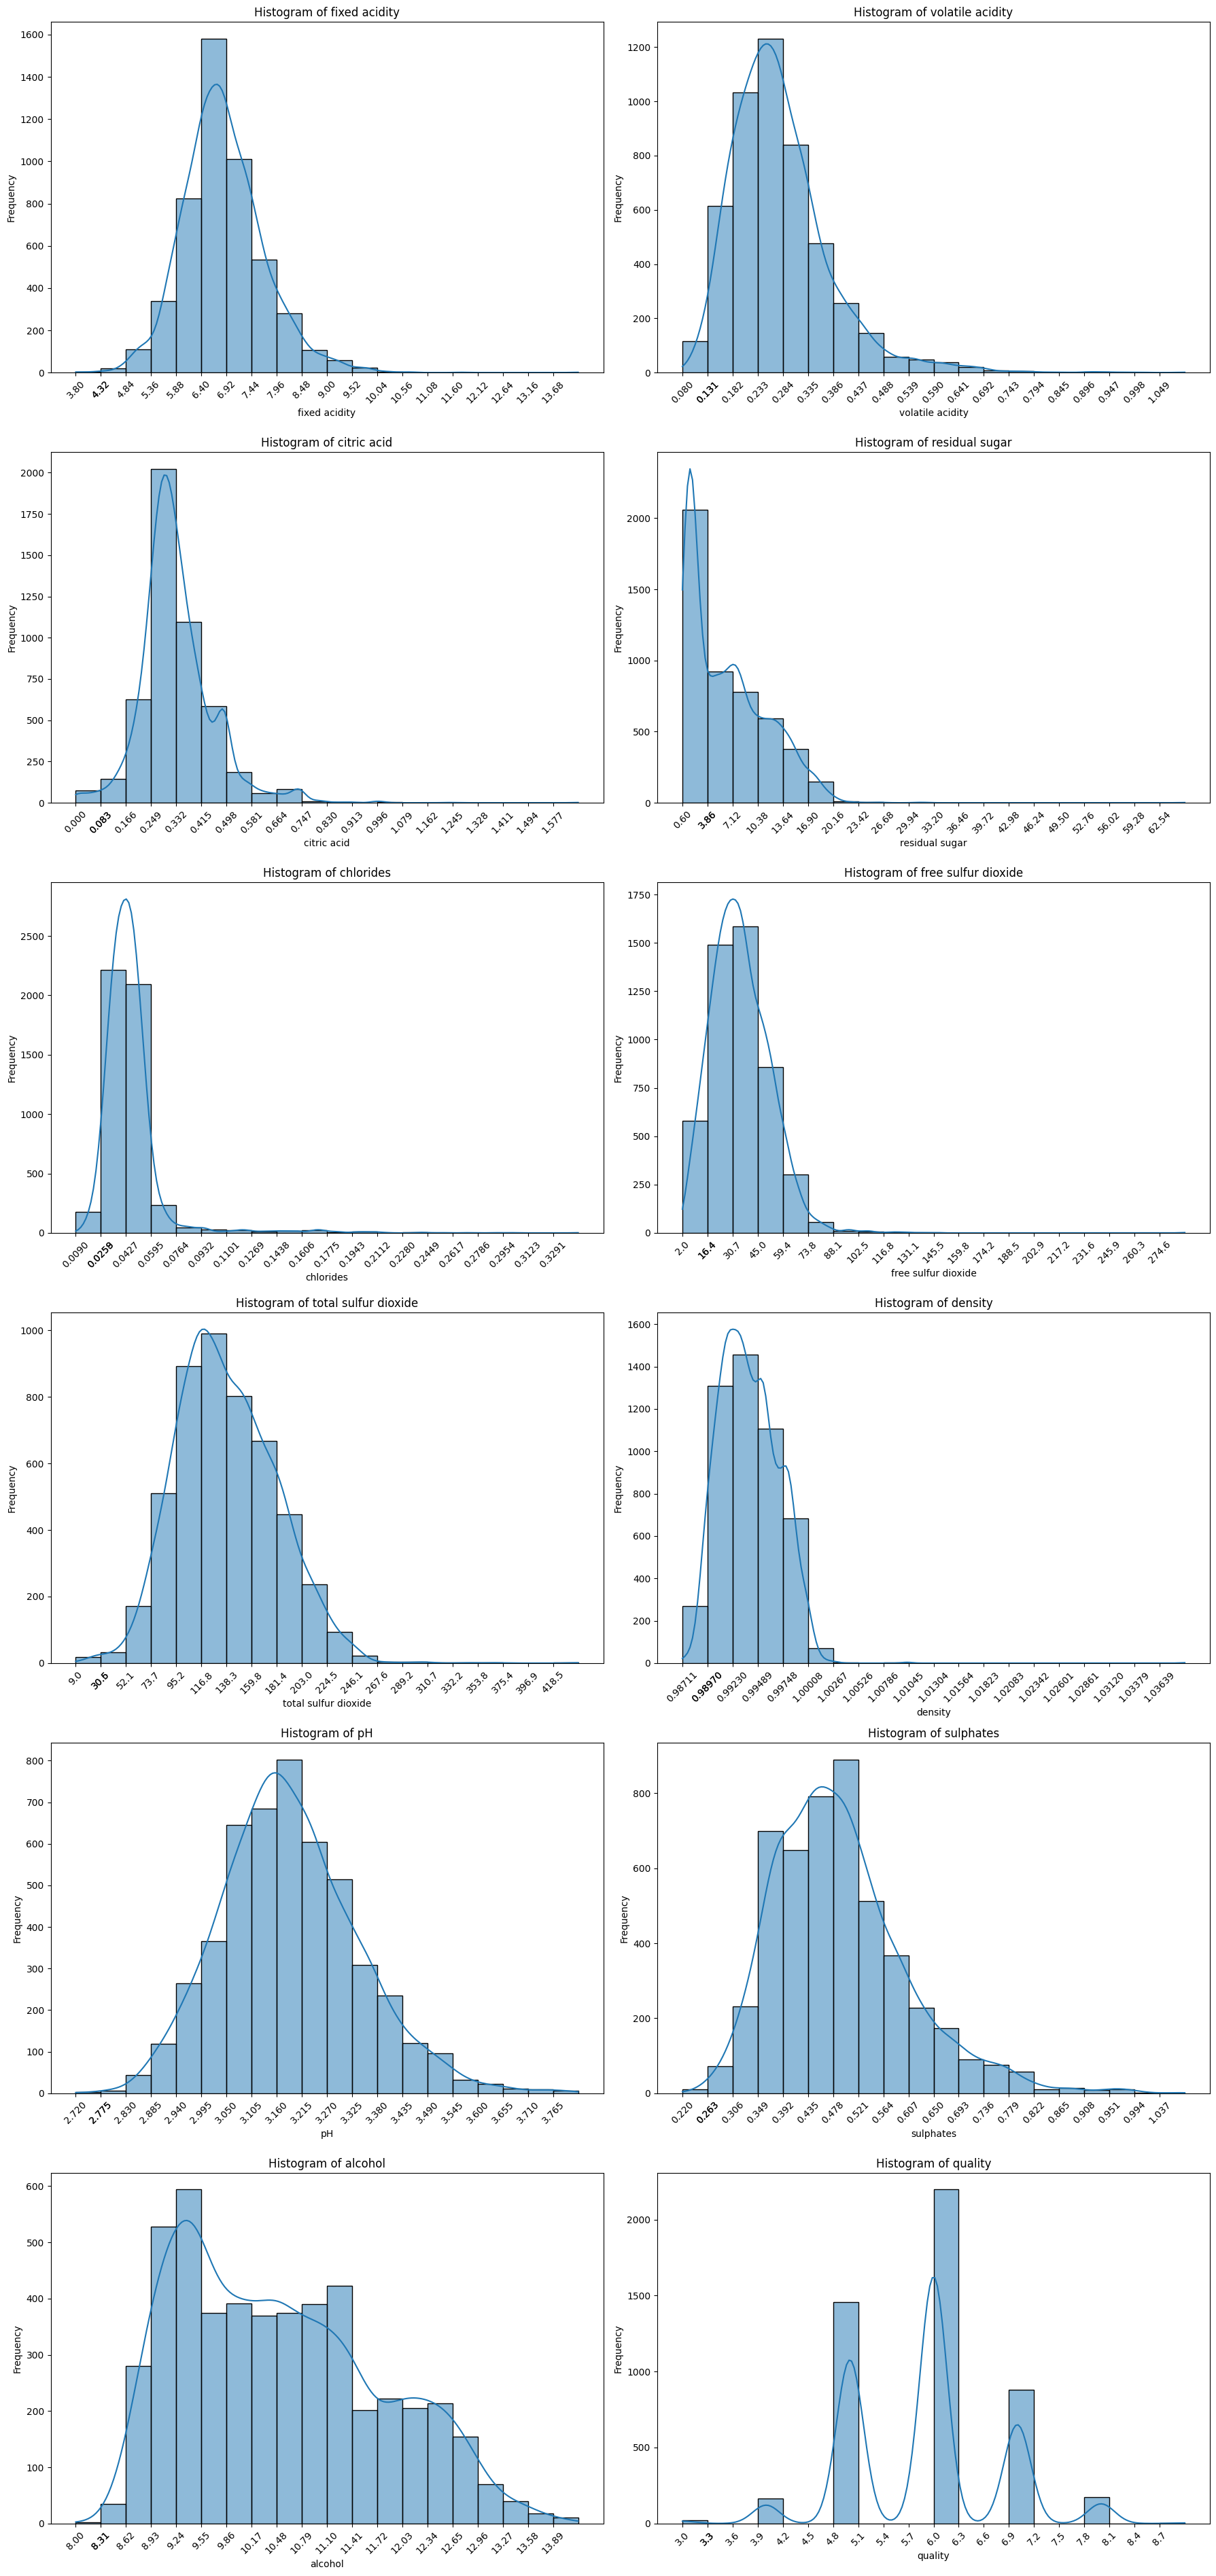

In [5]:
# Let's plot the histogram
fig, axes = plt.subplots(6, 2, figsize=(18,38))
axes = axes.flatten()

for i, column in enumerate(data):
    sns.histplot(data=data, x=column,bins=20,ax=axes[i],kde="True") #kde - kernel density estimator, basically helps us understand the distribution of data
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Adjusting the x label to show vlaues at start and end of each bin
    # Ticks in a plot are the small marks (along x and y axis)
    bin_edges = axes[i].patches[0].get_bbox().bounds #.get_bbox() finds the bounds of the particular bin it returns a list [x,y,width,height]
                                                     #.patches[0] picks up the particular bin
    ticks = [patch.get_x() for patch in axes[i].patches] + [bin_edges[2] + bin_edges[0]]
    axes[i].set_xticks(ticks)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# I Have displayed the ticks or at the endpoint of the bar or the Class Boundaries. Usually we display a Class's midpoint or 'Class Mark'


With the help of the above histogram we can understand that :-
- most of the columns have positively skewed data (though a few of them are very low positivly skewed).
    This means that most of the data points are concentrated on the left side of the histogram with a tail extending to the right.
- the columns "ph", "fixed acidity", have a normal distribution.
- higher quality view cluster aorund a specific ragne of each of them such as for alcohol level wines with quality higher than 7 are around 11.100 to 13.27.
- unsually low frequency ranges suggest presence of outliers

#### **Scatter Plot**
A scatter plot displays the relationship between two continuous variables by plotting individual data points on a Cartesian plane. It helps in understanding the distribution of points.

- Identification of Outliers: Points that are far from the main distribution can be identified as outliers.
- Trend Line: Additionally, we can draw a trend line to help us understand whether the points are correlated in an increasing or decreasing manner.

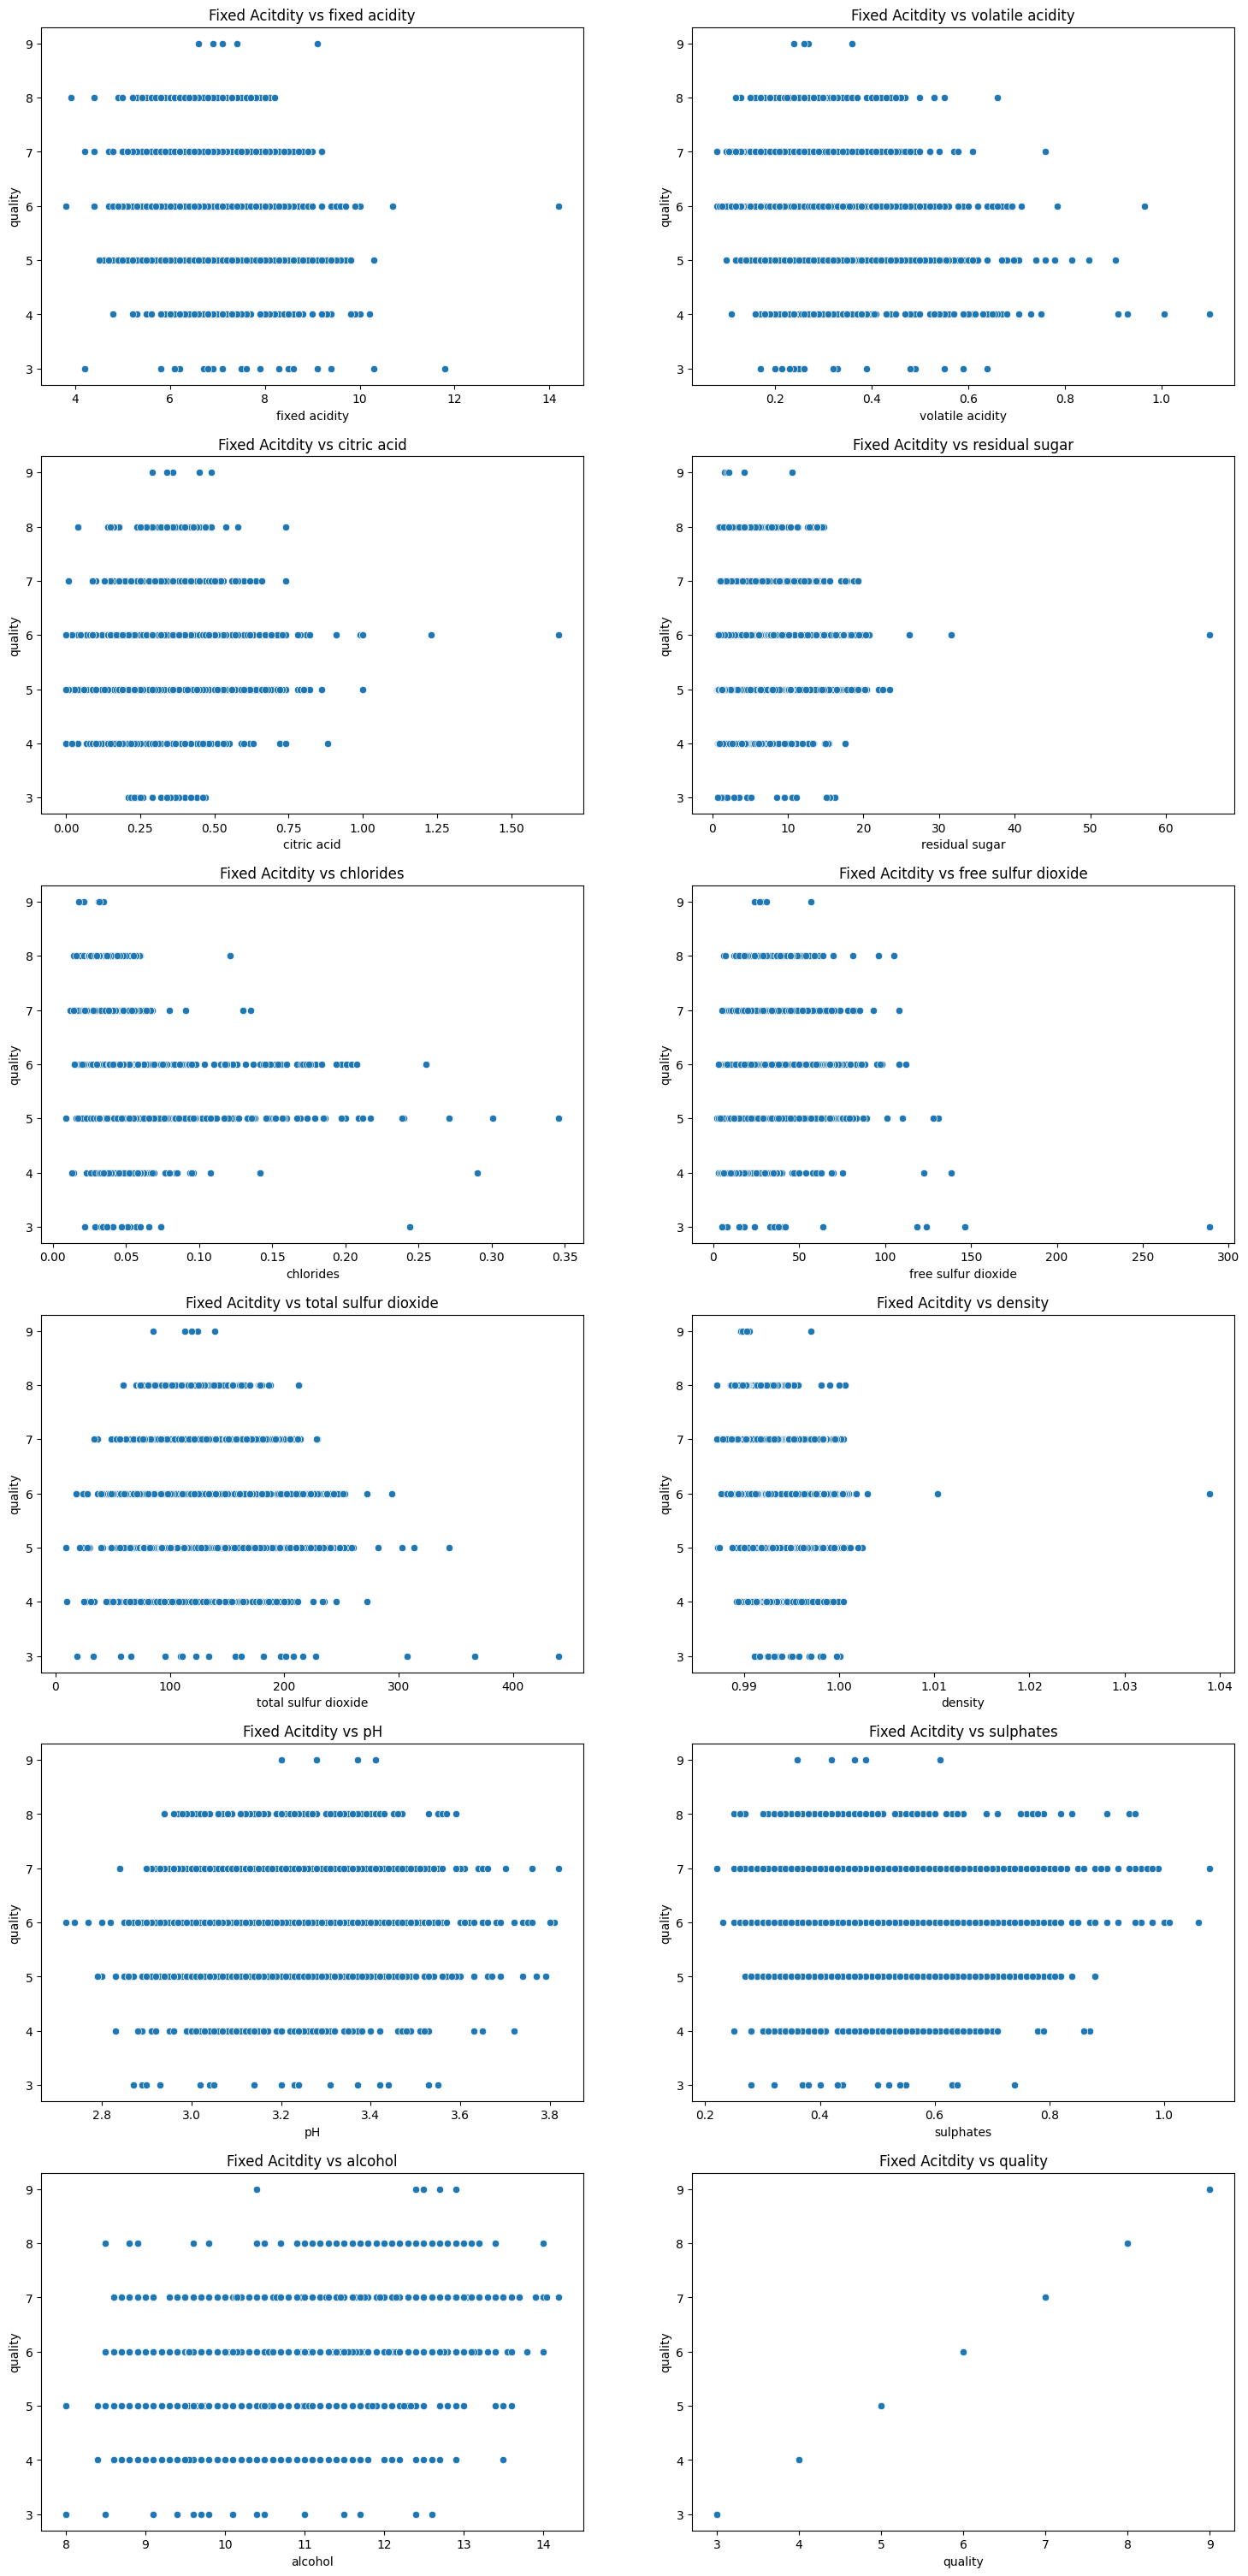

In [6]:
# let's start by plotting every columns vs quality

fig, axes = plt.subplots(6, 2, figsize=(18,38))
axes = axes.flatten()
for i,column in enumerate(data):
    sns.scatterplot(x = data[column],y= data['quality'],ax=axes[i])
    axes[i].set_title(f"Fixed Acitdity vs {column}")
plt.show()

We can't quit understand much, excpet identifying a few outlier here an there. Let's try plotting scatter plots of each column with another.
Starting with every-column with "Fixed Acidity"

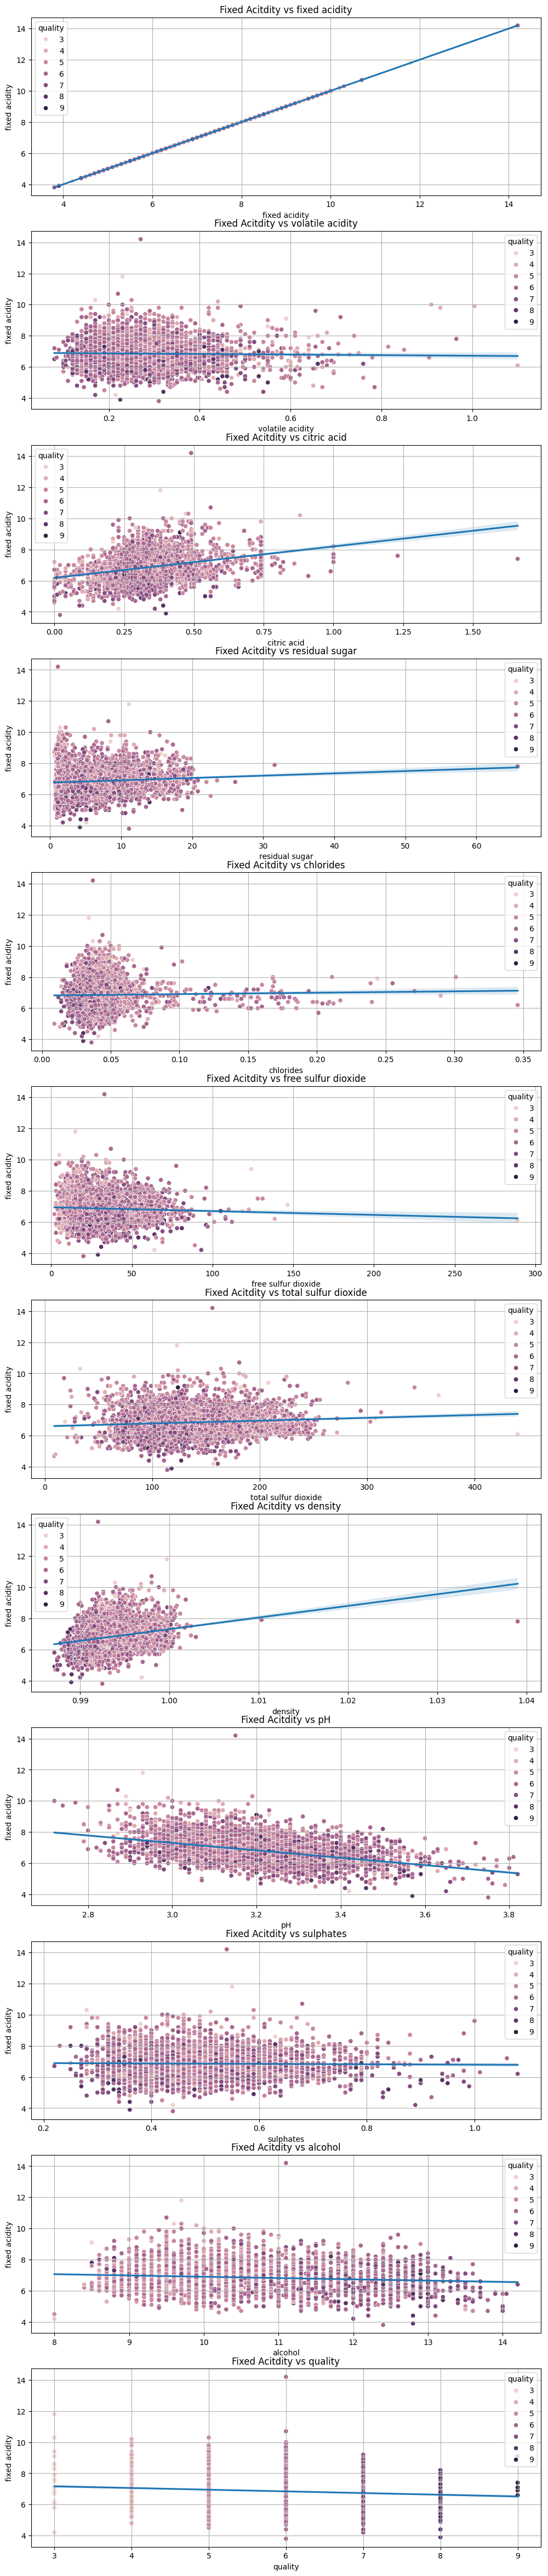

In [7]:
fig, axes = plt.subplots(12, 1, figsize=(12,60))
axes = axes.flatten()

for i,column1 in enumerate(data):
    sns.scatterplot(x = data[column1],y = data['fixed acidity'],hue=data['quality'], ax=axes[i])
    sns.regplot(x=data[column1],y=data['fixed acidity'],scatter=False, ax=axes[i])
    axes[i].set_title(f"Fixed Acitdity vs {column1}")
    axes[i].grid(True)

plt.show()


From the help of the above scatter plot we can understand:-
- we can quickly identify outliers in the plot.
- we can see most of the values form a cluster around specific ranges
- Plotting the trend line help understand trend for the columns "ph"(decreasing), "Sulphates", "Alcohol"(decreasing).
    say for the fixed acidity vs alcohol higher the value of alcohol , lower the value of fixed acidity.

These scatter plots simply help us understand the relation between (the corelation) any 2 colums of the data (here fixed acidity and rest).

#### Plotting correlation between two varibles using **HeatMap**

A heat map (or heatmap) is a 2-dimensional data visualization technique that represents the magnitude of individual values within a dataset as a color. The variation in color may be by hue or intensity. (Heat maps are usually of 2 types Spatial and grid, this one is grid.)

In our case we will use this to plot the Coorelation values of any 2 variables, this will help us understand which two variables are highly corelated and should be dealt with and which are not, and should be taken into consideration while building the model.

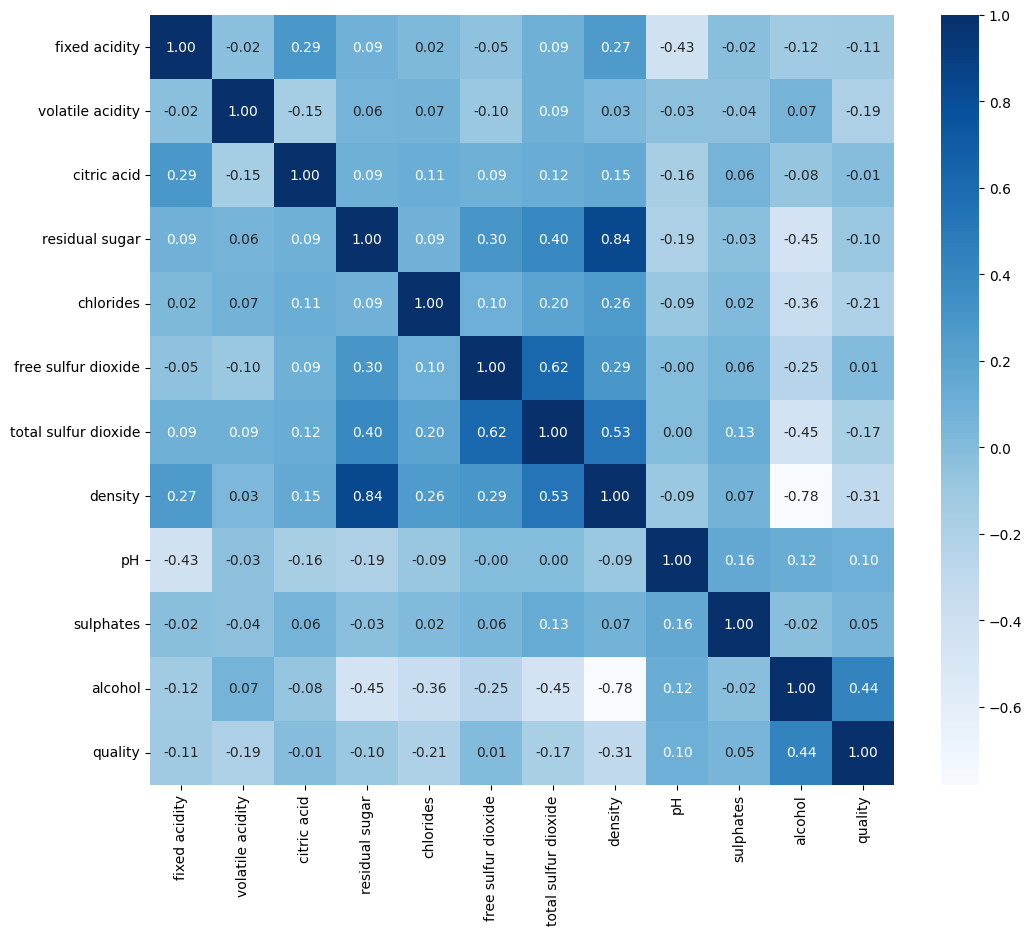

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),annot=True, fmt=".2f",cmap="Blues")
plt.show()

We can see that :-
- Any value with itself is highly co-related.
- "quality" and "alcohol" Columns have a correlation of 0.44 (i.e 1 increases the other increases.)
- except "sulphates" , "alcohol" all the Columns have a negative co-relation with "quality" column("free sulfure dioxide" has a co-relation of 0.01 which is almost 0).
- "free sulfure dioxide" and "total sulfure dioxide" is not co-related at all with column "ph".
- "density" is higly co-related with "residual sugars".
- similarly "free sulfure dioxide" and "total sulfure dioxide" are also co-related with "residual sugars".

sns **"Pairplot"** performs a viszualization of all this in a grid. try sns.pairplot(data).

With this, I have covered the major plots used in data analysis most of the time. Although there are many more plots that can help us visualize data, I will continue to learn about them and add them here gradually.